In [4]:
import numpy as np

# Replace with the actual path to your saved NPZ file
npz_path = "D:\\ASCC_parts_extended\\workspace\\model_params_20000_150_cams.npz"

# Load the npz file (it acts like a dictionary)
state_dict = np.load(npz_path)

# List the keys in the state dictionary
print("Keys in state_dict:", state_dict.files)

# For example, extract the 'gauss_params.means' parameter
means = state_dict["means"]
print("Shape of means:", means.shape)


# You can convert a parameter to a torch tensor if you need to perform operations with PyTorch
import torch
means_tensor = torch.from_numpy(means)
print("Means tensor:", means_tensor)

# Now you can run your experiments on these parameters, e.g., inspect distributions, perform statistical analyses, etc.


Keys in state_dict: ['features_dc', 'features_rest', 'means', 'opacities', 'quats', 'scales']
Shape of means: (57188, 3)
Means tensor: tensor([[-0.0628,  0.3064, -0.7104],
        [-0.2427,  0.1747, -0.4606],
        [-0.1385,  0.4004, -0.7104],
        ...,
        [ 0.0185, -0.2338, -0.6034],
        [ 0.0633, -0.0462, -0.5677],
        [-0.2401, -0.2636, -0.4250]])


Keys in state_dict: ['features_dc', 'features_rest', 'means', 'opacities', 'quats', 'scales']


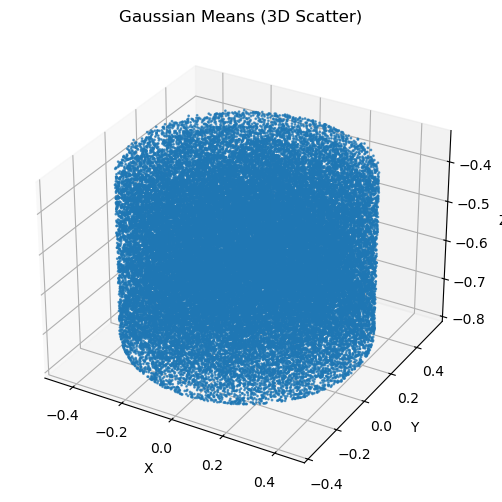

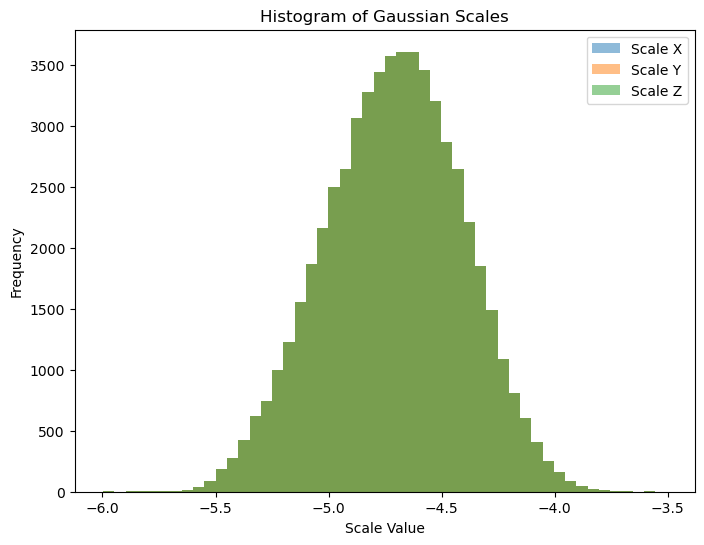

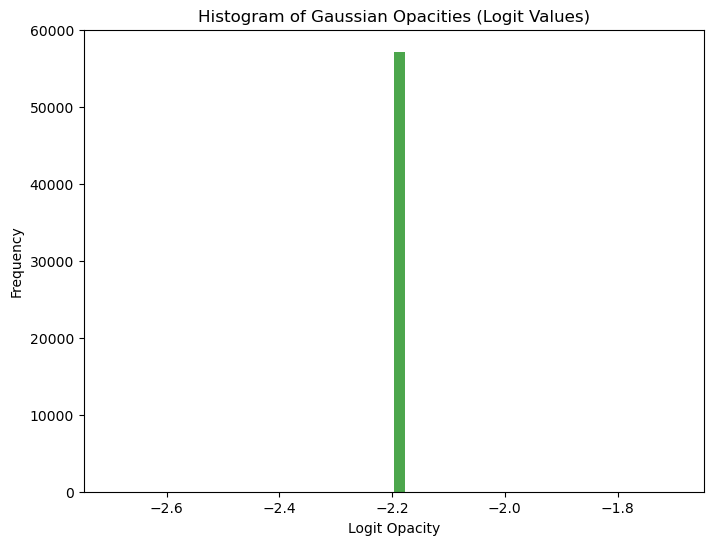

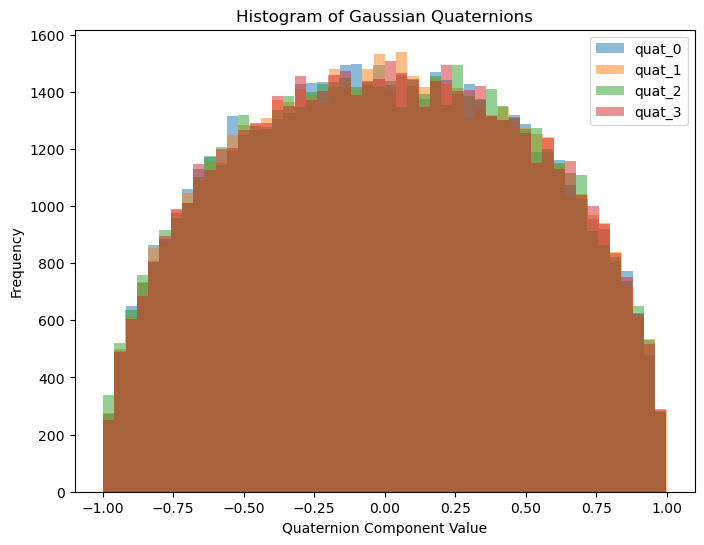

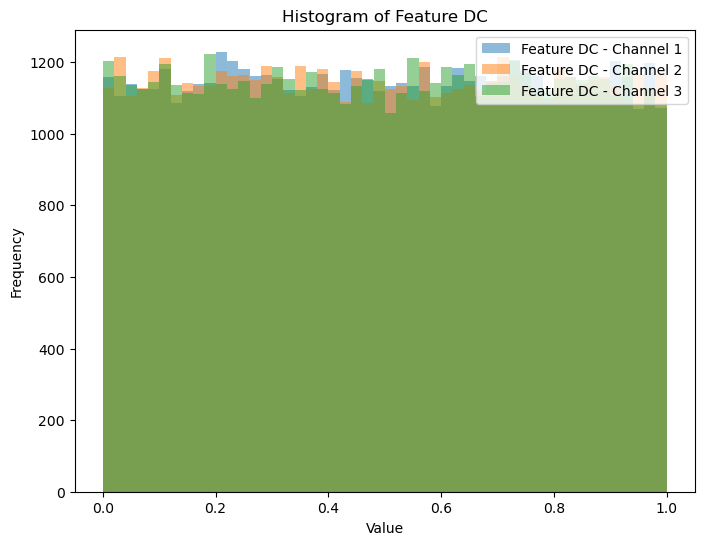

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting

# Replace with the actual path to your saved NPZ file
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"

# Load the npz file; this returns a dictionary-like object
state_dict = np.load(npz_path)

# List the keys in the state dictionary
print("Keys in state_dict:", state_dict.files)

# Extract parameters
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)
opacities = state_dict["opacities"]   # shape: (N, 1)
quats = state_dict["quats"]         # shape: (N, 4)
features_dc = state_dict["features_dc"]  # shape: (N, 3)
features_rest = state_dict["features_rest"]  # shape: (N, dim) where dim = (num_sh_bases - 1) * 3

# -------------------
# Plot Gaussian Means in 3D
# -------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(means[:, 0], means[:, 1], means[:, 2], s=1, alpha=0.7)
ax.set_title("Gaussian Means (3D Scatter)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# -------------------
# Plot Histograms of Scales (for each dimension)
# -------------------
plt.figure(figsize=(8, 6))
plt.hist(scales[:, 0], bins=50, alpha=0.5, label="Scale X")
plt.hist(scales[:, 1], bins=50, alpha=0.5, label="Scale Y")
plt.hist(scales[:, 2], bins=50, alpha=0.5, label="Scale Z")
plt.title("Histogram of Gaussian Scales")
plt.xlabel("Scale Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------
# Plot Histogram of Opacities (logit space)
# -------------------
plt.figure(figsize=(8, 6))
plt.hist(opacities.flatten(), bins=50, alpha=0.7, color="green")
plt.title("Histogram of Gaussian Opacities (Logit Values)")
plt.xlabel("Logit Opacity")
plt.ylabel("Frequency")
plt.show()

# -------------------
# Plot Histograms for Quaternion Components
# -------------------
plt.figure(figsize=(8, 6))
plt.hist(quats[:, 0], bins=50, alpha=0.5, label="quat_0")
plt.hist(quats[:, 1], bins=50, alpha=0.5, label="quat_1")
plt.hist(quats[:, 2], bins=50, alpha=0.5, label="quat_2")
plt.hist(quats[:, 3], bins=50, alpha=0.5, label="quat_3")
plt.title("Histogram of Gaussian Quaternions")
plt.xlabel("Quaternion Component Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------
# Optionally, inspect features_dc and features_rest
# For example, plot features_dc in RGB space (scatter of three channels)
# -------------------
plt.figure(figsize=(8, 6))
plt.hist(features_dc[:, 0], bins=50, alpha=0.5, label="Feature DC - Channel 1")
plt.hist(features_dc[:, 1], bins=50, alpha=0.5, label="Feature DC - Channel 2")
plt.hist(features_dc[:, 2], bins=50, alpha=0.5, label="Feature DC - Channel 3")
plt.title("Histogram of Feature DC")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Mean scale: -4.7114606
Std scale: 0.30400416
Lower threshold: -5.319468915462494
Upper threshold: -4.103452265262604
Number of abnormal scales: 2431


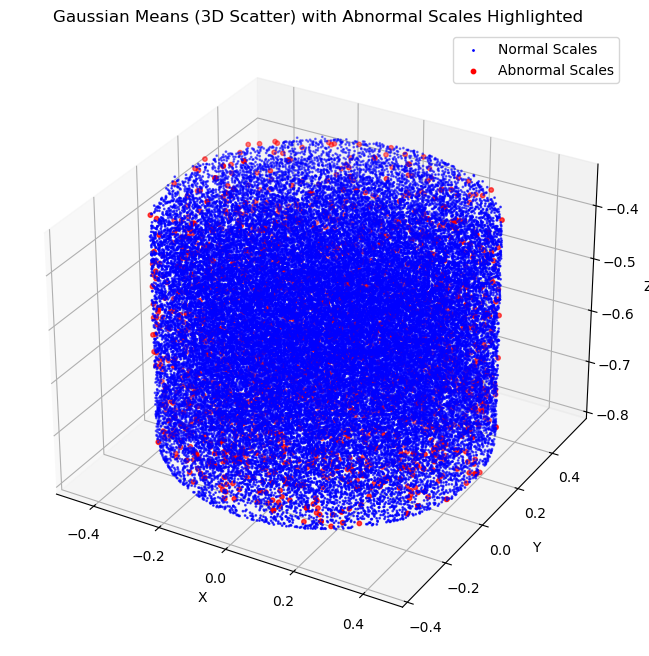

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Replace with the actual path to your saved NPZ file
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"

# Load the NPZ file (acts like a dictionary)
state_dict = np.load(npz_path)

# Extract parameters
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# Compute the average scale for each Gaussian (assuming scales are per-axis)
avg_scales = scales.mean(axis=1)  # shape: (N,)

# Define abnormal if the average scale is outside [mean - 2*std, mean + 2*std]
mean_scale = np.mean(avg_scales)
std_scale = np.std(avg_scales)
lower_threshold = mean_scale - 2 * std_scale
upper_threshold = mean_scale + 2 * std_scale

# Identify indices with abnormal scales
abnormal_mask = (avg_scales < lower_threshold) | (avg_scales > upper_threshold)
normal_mask = ~abnormal_mask

print("Mean scale:", mean_scale)
print("Std scale:", std_scale)
print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Number of abnormal scales:", np.sum(abnormal_mask))

# -------------------
# Plot Gaussian Means in 3D, highlighting abnormal ones
# -------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points in blue
ax.scatter(means[normal_mask, 0],
           means[normal_mask, 1],
           means[normal_mask, 2],
           s=1, color="blue", label="Normal Scales")

# Plot abnormal points in red (with a larger marker size)
ax.scatter(means[abnormal_mask, 0],
           means[abnormal_mask, 1],
           means[abnormal_mask, 2],
           s=10, color="red", label="Abnormal Scales")

ax.set_title("Gaussian Means (3D Scatter) with Abnormal Scales Highlighted")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()



Keys in state_dict: ['features_dc', 'features_rest', 'means', 'opacities', 'quats', 'scales']
Mean scale: -4.7114606
Std scale: 0.30400416
Lower threshold: -5.319468915462494
Upper threshold: -4.103452265262604
Number of abnormal scales: 2431
Unique region IDs: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


C:\Users\abhilash.durgam\AppData\Local\Temp\ipykernel_25468\2485217950.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(unique_regions))


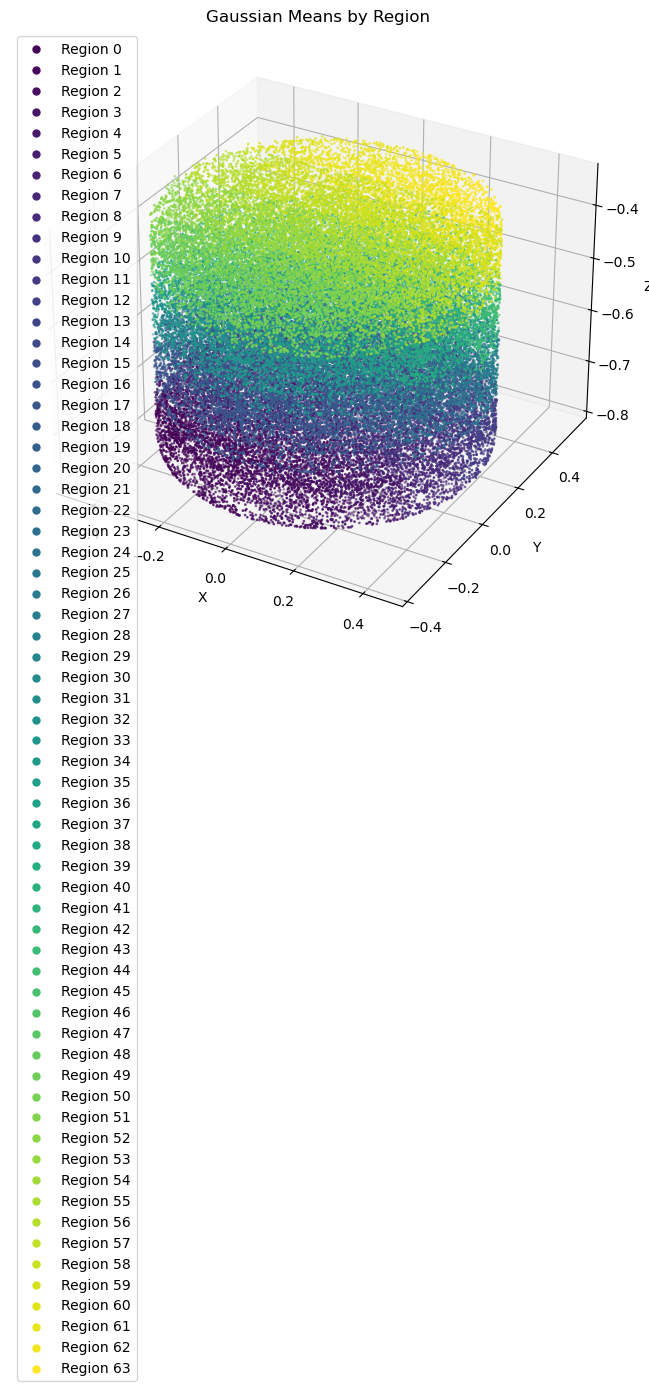

Abnormal region counts: {0: 25, 1: 79, 2: 54, 3: 23, 4: 61, 5: 98, 6: 67, 7: 68, 8: 62, 9: 67, 10: 86, 11: 60, 12: 30, 13: 82, 14: 80, 15: 42, 16: 7, 17: 41, 18: 41, 19: 12, 20: 43, 21: 30, 22: 31, 23: 47, 24: 36, 25: 36, 26: 25, 27: 34, 28: 17, 29: 35, 30: 43, 31: 13, 32: 20, 33: 21, 34: 37, 35: 16, 36: 26, 37: 27, 38: 36, 39: 37, 40: 34, 41: 22, 42: 24, 43: 51, 44: 16, 45: 24, 46: 34, 47: 12, 48: 13, 49: 39, 50: 38, 51: 11, 52: 44, 53: 49, 54: 36, 55: 39, 56: 44, 57: 33, 58: 46, 59: 35, 60: 16, 61: 27, 62: 34, 63: 15}


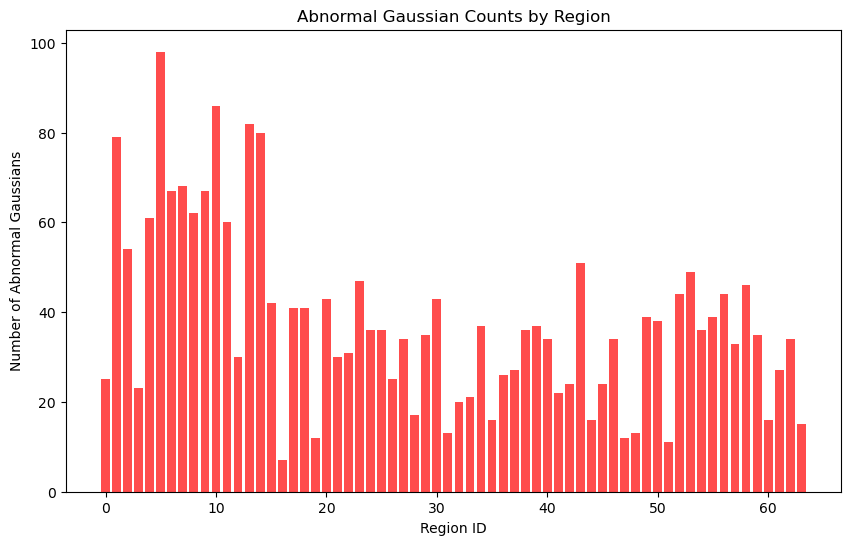

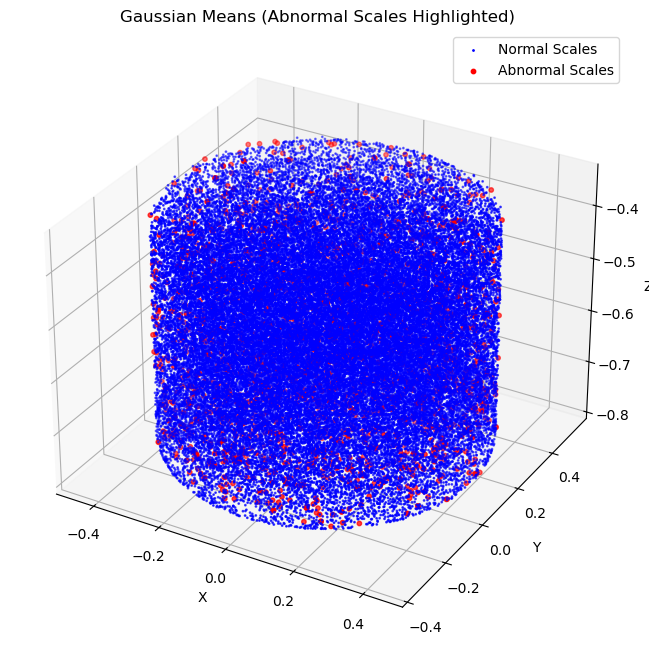

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting
import matplotlib.cm as cm

# ---------------------------
# Load the NPZ file
# ---------------------------
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)
print("Keys in state_dict:", state_dict.files)

# Extract parameters
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# ---------------------------
# Identify Abnormal Scales
# ---------------------------
# Compute the average scale for each Gaussian (average across the three axes)
avg_scales = scales.mean(axis=1)  # shape: (N,)
mean_scale = np.mean(avg_scales)
std_scale = np.std(avg_scales)
lower_threshold = mean_scale - 2 * std_scale
upper_threshold = mean_scale + 2 * std_scale

# Define abnormal Gaussians as those with avg scale outside the threshold range.
abnormal_mask = (avg_scales < lower_threshold) | (avg_scales > upper_threshold)
normal_mask = ~abnormal_mask

print("Mean scale:", mean_scale)
print("Std scale:", std_scale)
print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Number of abnormal scales:", np.sum(abnormal_mask))

# ---------------------------
# Bin the Means by Region
# ---------------------------
# Define number of bins along each axis (you can adjust this value)
n_bins = 4

# Compute the min and max for each dimension
x_min, y_min, z_min = means.min(axis=0)
x_max, y_max, z_max = means.max(axis=0)

# Create bin edges for each axis
x_edges = np.linspace(x_min, x_max, n_bins + 1)
y_edges = np.linspace(y_min, y_max, n_bins + 1)
z_edges = np.linspace(z_min, z_max, n_bins + 1)

# Use np.digitize to determine the bin index for each coordinate.
# Note: np.digitize returns indices in 1...n_bins so we subtract 1 to get 0-based indices.
bin_x = np.clip(np.digitize(means[:, 0], x_edges) - 1, 0, n_bins - 1)
bin_y = np.clip(np.digitize(means[:, 1], y_edges) - 1, 0, n_bins - 1)
bin_z = np.clip(np.digitize(means[:, 2], z_edges) - 1, 0, n_bins - 1)

# Create a single region ID from the three bin indices
region_ids = bin_x + n_bins * (bin_y + n_bins * bin_z)
unique_regions = np.unique(region_ids)
print("Unique region IDs:", unique_regions)

# ---------------------------
# Plot the Means by Region (3D Scatter)
# ---------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cmap = cm.get_cmap('viridis', len(unique_regions))

for i, region in enumerate(unique_regions):
    idx = region_ids == region
    ax.scatter(means[idx, 0], means[idx, 1], means[idx, 2],
               s=1, color=cmap(i), label=f"Region {region}")

ax.set_title("Gaussian Means by Region")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(markerscale=5)
plt.show()

# ---------------------------
# Highlight Abnormal Gaussians per Region
# ---------------------------
# Count number of abnormal Gaussians per region.
abnormal_region_counts = {}
for region in unique_regions:
    idx = (region_ids == region)
    count_abnormal = np.sum(abnormal_mask[idx])
    abnormal_region_counts[region] = count_abnormal

print("Abnormal region counts:", abnormal_region_counts)

# Plot a bar chart showing the abnormal counts per region.
plt.figure(figsize=(10, 6))
regions = list(abnormal_region_counts.keys())
counts = [abnormal_region_counts[r] for r in regions]
plt.bar(regions, counts, color='red', alpha=0.7)
plt.xlabel("Region ID")
plt.ylabel("Number of Abnormal Gaussians")
plt.title("Abnormal Gaussian Counts by Region")
plt.show()

# ---------------------------
# Optionally, Plot Abnormal vs. Normal in 3D
# ---------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot normal Gaussians in blue
ax.scatter(means[normal_mask, 0], means[normal_mask, 1], means[normal_mask, 2],
           s=1, color="blue", label="Normal Scales")
# Plot abnormal Gaussians in red
ax.scatter(means[abnormal_mask, 0], means[abnormal_mask, 1], means[abnormal_mask, 2],
           s=10, color="red", label="Abnormal Scales")
ax.set_title("Gaussian Means (Abnormal Scales Highlighted)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Keys in state_dict: ['features_dc', 'features_rest', 'means', 'opacities', 'quats', 'scales']
Mean scale: -4.7114606
Std scale: 0.30400416
Lower threshold: -5.319468915462494
Upper threshold: -4.103452265262604
Number of abnormal Gaussians: 2431
Cluster 0: Center = [ 0.04185952 -0.18162358 -0.58148384], Avg Scale = -4.846273899078369
Cluster 1: Center = [-0.05776463  0.36570147 -0.607327  ], Avg Scale = -4.822417259216309
Cluster 2: Center = [ 0.27627715  0.15762205 -0.5916944 ], Avg Scale = -4.833266735076904
Cluster 3: Center = [-0.27314445  0.03831653 -0.5971447 ], Avg Scale = -4.784285068511963


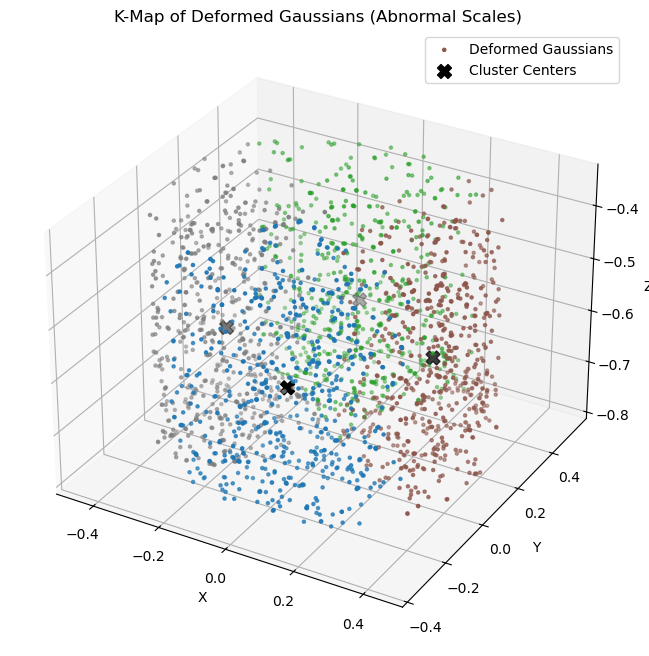

Cluster 0: Center (X, Y, Z) = [ 0.04185952 -0.18162358 -0.58148384], Average Scale = -4.846273899078369
Cluster 1: Center (X, Y, Z) = [-0.05776463  0.36570147 -0.607327  ], Average Scale = -4.822417259216309
Cluster 2: Center (X, Y, Z) = [ 0.27627715  0.15762205 -0.5916944 ], Average Scale = -4.833266735076904
Cluster 3: Center (X, Y, Z) = [-0.27314445  0.03831653 -0.5971447 ], Average Scale = -4.784285068511963


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# ---------------------------
# Custom K-means implementation using numpy
# ---------------------------
def my_kmeans(X, k, max_iter=100, tol=1e-4, random_seed=42):
    """
    A simple K-means clustering implementation in numpy.
    
    Args:
        X (np.ndarray): Data array of shape (N, D).
        k (int): Number of clusters.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for convergence (max change in cluster centers).
        random_seed (int): Seed for random number generator.
        
    Returns:
        centers (np.ndarray): Cluster centers of shape (k, D).
        labels (np.ndarray): Cluster label for each point, shape (N,).
    """
    np.random.seed(random_seed)
    N, D = X.shape
    # Initialize centers by randomly selecting k data points.
    indices = np.random.choice(N, k, replace=False)
    centers = X[indices].copy()
    
    for iteration in range(max_iter):
        # Compute Euclidean distances from each point to each center.
        distances = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)  # (N, k)
        labels = np.argmin(distances, axis=1)  # Assign each point to the nearest center
        
        # Compute new centers as the mean of assigned points.
        new_centers = np.zeros_like(centers)
        for j in range(k):
            if np.any(labels == j):
                new_centers[j] = np.mean(X[labels == j], axis=0)
            else:
                # If a cluster becomes empty, reinitialize its center randomly.
                new_centers[j] = X[np.random.choice(N)]
        
        # Check for convergence.
        if np.max(np.linalg.norm(new_centers - centers, axis=1)) < tol:
            centers = new_centers
            break
        
        centers = new_centers
        
    return centers, labels

# ---------------------------
# Load the NPZ file
# ---------------------------
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)
print("Keys in state_dict:", state_dict.files)

# Extract parameters
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# ---------------------------
# Identify Abnormal (Deformed) Gaussians Based on Scales
# ---------------------------
# Compute the average scale for each Gaussian
avg_scales = scales.mean(axis=1)  # shape: (N,)
mean_scale = np.mean(avg_scales)
std_scale = np.std(avg_scales)
# Define abnormal Gaussians as those outside mean ± 2*std
lower_threshold = mean_scale - 2 * std_scale
upper_threshold = mean_scale + 2 * std_scale

abnormal_mask = (avg_scales < lower_threshold) | (avg_scales > upper_threshold)
normal_mask = ~abnormal_mask

print("Mean scale:", mean_scale)
print("Std scale:", std_scale)
print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Number of abnormal Gaussians:", np.sum(abnormal_mask))

# Extract the abnormal (deformed) means and their corresponding average scales
deformed_means = means[abnormal_mask]          # shape: (M, 3)
deformed_avg_scales = avg_scales[abnormal_mask]  # shape: (M,)

# ---------------------------
# Cluster the Deformed Gaussians Using our Custom K-means
# ---------------------------
K = 4  # set number of clusters
centers, labels = my_kmeans(deformed_means, k=K, max_iter=100, tol=1e-4, random_seed=42)

# Compute the average scale for each cluster
cluster_avg_scales = []
for k in range(K):
    cluster_mask = (labels == k)
    if np.any(cluster_mask):
        avg_cluster_scale = deformed_avg_scales[cluster_mask].mean()
    else:
        avg_cluster_scale = None
    cluster_avg_scales.append(avg_cluster_scale)
    print(f"Cluster {k}: Center = {centers[k]}, Avg Scale = {avg_cluster_scale}")

# ---------------------------
# Plot the Deformed Gaussians and Their Cluster Centers in 3D
# ---------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color points by cluster label using a colormap
colors = plt.cm.tab10(labels.astype(float) / K)

ax.scatter(deformed_means[:, 0], deformed_means[:, 1], deformed_means[:, 2],
           c=colors, s=5, label="Deformed Gaussians")
# Plot cluster centers as large black markers.
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           color="black", s=100, marker="X", label="Cluster Centers")
ax.set_title("K-Map of Deformed Gaussians (Abnormal Scales)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

# Optionally, print a summary of the clusters.
for k in range(K):
    print(f"Cluster {k}: Center (X, Y, Z) = {centers[k]}, Average Scale = {cluster_avg_scales[k]}")


Keys in state_dict: ['features_dc', 'features_rest', 'means', 'opacities', 'quats', 'scales']
Mean scale: -4.7114606
Std scale: 0.30400416
Lower threshold: -5.319468915462494
Upper threshold: -4.103452265262604
Number of abnormal Gaussians: 2431
Cluster 0: Center = [ 0.04185952 -0.18162358 -0.58148384], Avg Scale = -4.846273899078369
Cluster 1: Center = [-0.05776463  0.36570147 -0.607327  ], Avg Scale = -4.822417259216309
Cluster 2: Center = [ 0.27627715  0.15762205 -0.5916944 ], Avg Scale = -4.833266735076904
Cluster 3: Center = [-0.27314445  0.03831653 -0.5971447 ], Avg Scale = -4.784285068511963


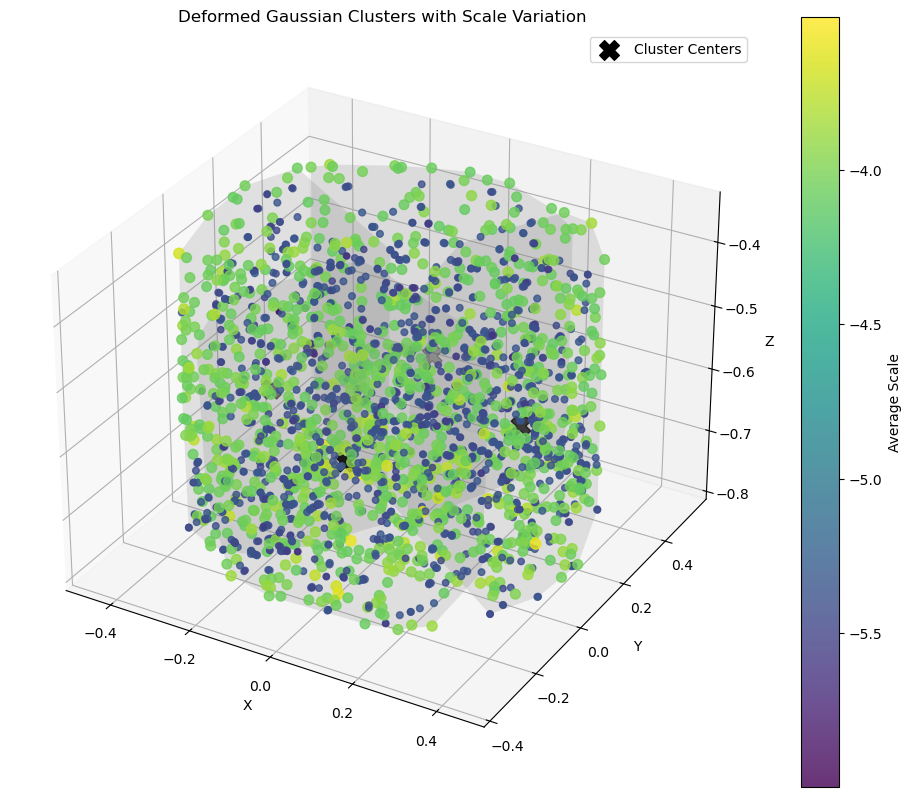

Cluster 0:
  Center (X, Y, Z): [ 0.04185952 -0.18162358 -0.58148384]
  Average Scale: -4.846273899078369
  Bounds: min=[-0.26123512 -0.3590234  -0.78176165], max=[ 0.36985022  0.07950309 -0.3536056 ]
Cluster 1:
  Center (X, Y, Z): [-0.05776463  0.36570147 -0.607327  ]
  Average Scale: -4.822417259216309
  Bounds: min=[-0.3623197   0.10866439 -0.78176165], max=[ 0.22644101  0.53829944 -0.3536056 ]
Cluster 2:
  Center (X, Y, Z): [ 0.27627715  0.15762205 -0.5916944 ]
  Average Scale: -4.833266735076904
  Bounds: min=[ 0.03281466 -0.14678946 -0.78176165], max=[ 0.4459823   0.46097073 -0.3536056 ]
Cluster 3:
  Center (X, Y, Z): [-0.27314445  0.03831653 -0.5971447 ]
  Average Scale: -4.784285068511963
  Bounds: min=[-0.44882312 -0.25920635 -0.78176165], max=[-0.01180301  0.3320761  -0.3536056 ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.spatial import ConvexHull  # For computing convex hulls (optional)

# --- Custom K-Means (without sklearn) ---
def my_kmeans(X, k, max_iter=100, tol=1e-4, random_seed=42):
    """
    A simple K-means clustering implementation using NumPy.
    
    Args:
        X (np.ndarray): Data array of shape (N, D).
        k (int): Number of clusters.
        max_iter (int): Maximum number of iterations.
        tol (float): Convergence tolerance.
        random_seed (int): Random seed for initialization.
        
    Returns:
        centers (np.ndarray): Cluster centers of shape (k, D).
        labels (np.ndarray): Cluster labels for each point (N,).
    """
    np.random.seed(random_seed)
    N, D = X.shape
    # Initialize centers by randomly choosing k data points.
    indices = np.random.choice(N, k, replace=False)
    centers = X[indices].copy()
    
    for i in range(max_iter):
        # Compute distances from each point to each center.
        distances = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)  # Shape: (N, k)
        labels = np.argmin(distances, axis=1)
        
        # Update centers.
        new_centers = np.array([X[labels == j].mean(axis=0) if np.any(labels == j) else centers[j]
                                  for j in range(k)])
        
        if np.max(np.linalg.norm(new_centers - centers, axis=1)) < tol:
            centers = new_centers
            break
        centers = new_centers
    return centers, labels

# ---------------------------
# Load the NPZ file
# ---------------------------
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)
print("Keys in state_dict:", state_dict.files)

# Extract parameters
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# ---------------------------
# Identify Abnormal (Deformed) Gaussians Based on Scales
# ---------------------------
# Compute the average scale for each Gaussian (average of x, y, z scales)
avg_scales = scales.mean(axis=1)  # Shape: (N,)
mean_scale = np.mean(avg_scales)
std_scale = np.std(avg_scales)

# Define abnormal Gaussians as those with avg scale outside [mean - 2*std, mean + 2*std]
lower_threshold = mean_scale - 2 * std_scale
upper_threshold = mean_scale + 2 * std_scale
abnormal_mask = (avg_scales < lower_threshold) | (avg_scales > upper_threshold)
print("Mean scale:", mean_scale)
print("Std scale:", std_scale)
print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Number of abnormal Gaussians:", np.sum(abnormal_mask))

# Extract deformed Gaussians
deformed_means = means[abnormal_mask]           # (M, 3)
deformed_avg_scales = avg_scales[abnormal_mask]   # (M,)

# ---------------------------
# Cluster the Deformed Gaussians Using Custom K-means
# ---------------------------
K = 4  # Number of clusters
centers, labels = my_kmeans(deformed_means, k=K, max_iter=100, tol=1e-4, random_seed=42)

# For each cluster, compute average scale of abnormal Gaussians
cluster_avg_scales = []
for k in range(K):
    cluster_mask = (labels == k)
    avg_cluster_scale = deformed_avg_scales[cluster_mask].mean() if np.any(cluster_mask) else None
    cluster_avg_scales.append(avg_cluster_scale)
    print(f"Cluster {k}: Center = {centers[k]}, Avg Scale = {avg_cluster_scale}")

# ---------------------------
# Plot the Geometry of Clusters with Scale Information
# ---------------------------
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalize scales for marker sizing
min_scale_val = deformed_avg_scales.min()
max_scale_val = deformed_avg_scales.max()
# Scale marker sizes: adjust factor as needed.
marker_sizes = 50 * (deformed_avg_scales - min_scale_val) / (max_scale_val - min_scale_val + 1e-8) + 10

# Create a scatter plot: color indicates the scale value.
sc = ax.scatter(deformed_means[:, 0], deformed_means[:, 1], deformed_means[:, 2],
                s=marker_sizes, c=deformed_avg_scales, cmap='viridis', alpha=0.8)

# Plot cluster centers as large black X markers.
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           s=200, c='black', marker='X', label='Cluster Centers')

# Optionally, plot the convex hull of each cluster to illustrate the cluster geometry.
for k in range(K):
    cluster_points = deformed_means[labels == k]
    if cluster_points.shape[0] >= 4:
        try:
            hull = ConvexHull(cluster_points)
            # Plot each face of the convex hull.
            for simplex in hull.simplices:
                tri = cluster_points[simplex]
                ax.plot_trisurf(tri[:, 0], tri[:, 1], tri[:, 2],
                                color='gray', alpha=0.1, shade=False)
        except Exception as e:
            print(f"Could not compute convex hull for cluster {k}: {e}")

ax.set_title("Deformed Gaussian Clusters with Scale Variation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.colorbar(sc, ax=ax, label="Average Scale")
ax.legend()
plt.show()

# ---------------------------
# Print a Summary: Rough Coordinates of Deformed Means and Scales per Cluster
# ---------------------------
for k in range(K):
    print(f"Cluster {k}:")
    print(f"  Center (X, Y, Z): {centers[k]}")
    print(f"  Average Scale: {cluster_avg_scales[k]}")
    # Optionally, list the bounds (min/max) of the cluster geometry:
    cluster_points = deformed_means[labels == k]
    if cluster_points.shape[0] > 0:
        bounds = np.array([cluster_points.min(axis=0), cluster_points.max(axis=0)])
        print(f"  Bounds: min={bounds[0]}, max={bounds[1]}")


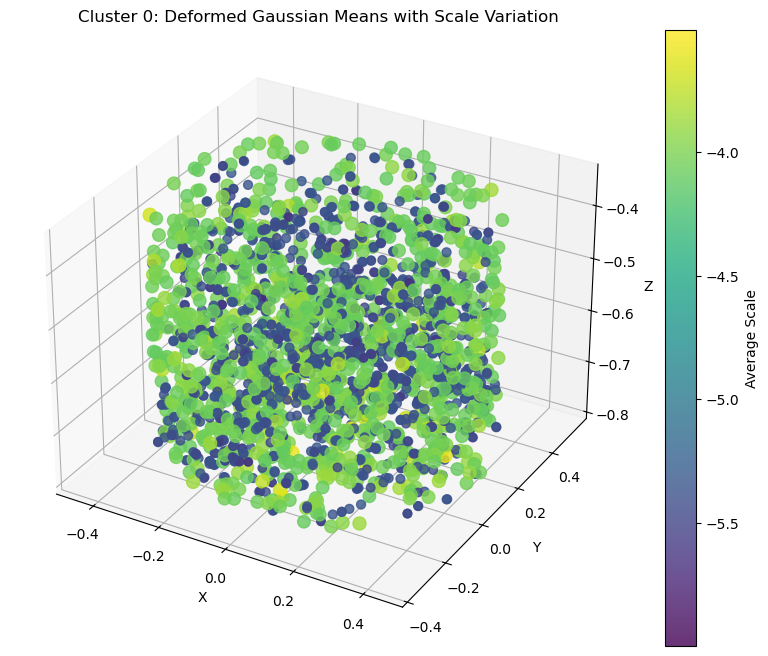

Cluster 0 Summary:
 - Number of Gaussians: 2431
 - X bounds: -0.44882312 - 0.4459823
 - Y bounds: -0.3590234 - 0.53829944
 - Z bounds: -0.78176165 - -0.3536056


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Assume we have already loaded the NPZ file and identified abnormal Gaussians.
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)

# Extract parameters: means and scales.
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# Compute average scale for each Gaussian.
avg_scales = scales.mean(axis=1)  # shape: (N,)

# Define abnormal Gaussians based on a threshold (here mean ± 2*std).
mean_scale = np.mean(avg_scales)
std_scale = np.std(avg_scales)
lower_threshold = mean_scale - 2 * std_scale
upper_threshold = mean_scale + 2 * std_scale
abnormal_mask = (avg_scales < lower_threshold) | (avg_scales > upper_threshold)

# For this example, we consider only the abnormal Gaussians.
deformed_means = means[abnormal_mask]
deformed_avg_scales = avg_scales[abnormal_mask]

# --- For demonstration, we assume that these deformed Gaussians belong to a single cluster.
# (If you have clusters computed already, select one cluster from your clustering results.)
# For this snippet, we'll simply use all deformed Gaussians as "cluster 0".
cluster_means = deformed_means
cluster_scales = deformed_avg_scales

# Normalize scale values for visualization (for marker sizing)
min_scale = cluster_scales.min()
max_scale = cluster_scales.max()
# Map scale values to marker sizes, for instance, between 20 and 100.
marker_sizes = 20 + 80 * (cluster_scales - min_scale) / (max_scale - min_scale + 1e-8)

# Create a 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: position from cluster_means and color represents the scale.
sc = ax.scatter(cluster_means[:, 0], cluster_means[:, 1], cluster_means[:, 2],
                s=marker_sizes, c=cluster_scales, cmap='viridis', alpha=0.8)

ax.set_title("Cluster 0: Deformed Gaussian Means with Scale Variation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.colorbar(sc, ax=ax, label="Average Scale")
plt.show()

# Optionally, print a summary of the selected cluster geometry.
print("Cluster 0 Summary:")
print(" - Number of Gaussians:", cluster_means.shape[0])
print(" - X bounds:", cluster_means[:, 0].min(), "-", cluster_means[:, 0].max())
print(" - Y bounds:", cluster_means[:, 1].min(), "-", cluster_means[:, 1].max())
print(" - Z bounds:", cluster_means[:, 2].min(), "-", cluster_means[:, 2].max())


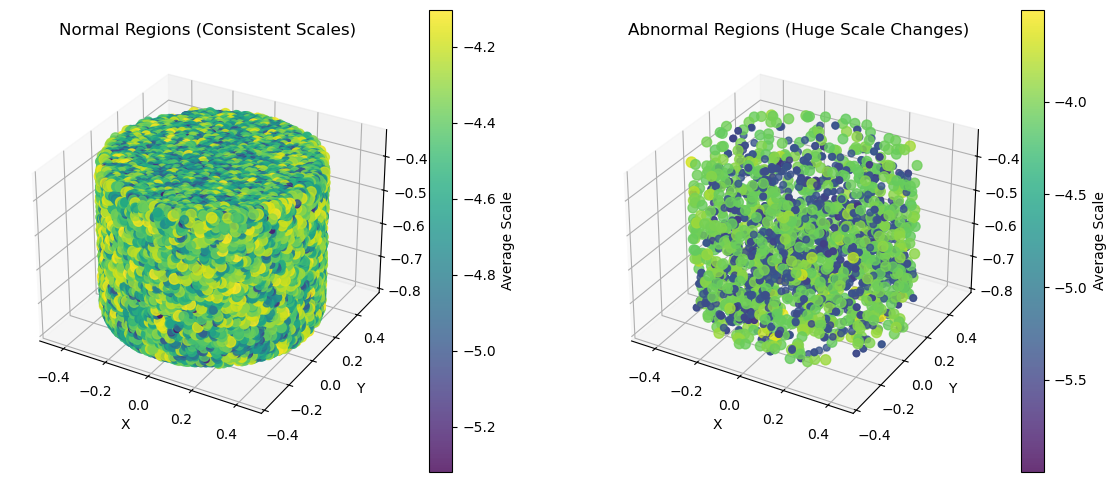

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load NPZ file and extract parameters
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)
avg_scales = scales.mean(axis=1)

# Define normal vs. abnormal by a simple threshold (mean ± 2*std)
global_mean = np.mean(avg_scales)
global_std = np.std(avg_scales)
lower_threshold = global_mean - 2 * global_std
upper_threshold = global_mean + 2 * global_std

normal_mask = (avg_scales >= lower_threshold) & (avg_scales <= upper_threshold)
abnormal_mask = ~normal_mask

# Plot normal Gaussians
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
marker_sizes_normal = 50 * (avg_scales[normal_mask] - avg_scales[normal_mask].min()) / \
    (avg_scales[normal_mask].max() - avg_scales[normal_mask].min() + 1e-8) + 10
sc1 = ax1.scatter(means[normal_mask, 0], means[normal_mask, 1], means[normal_mask, 2],
                  s=marker_sizes_normal, c=avg_scales[normal_mask], cmap='viridis', alpha=0.8)
ax1.set_title("Normal Regions (Consistent Scales)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
fig.colorbar(sc1, ax=ax1, label="Average Scale")

# Plot abnormal Gaussians
ax2 = fig.add_subplot(122, projection='3d')
marker_sizes_abnormal = 50 * (avg_scales[abnormal_mask] - avg_scales[abnormal_mask].min()) / \
    (avg_scales[abnormal_mask].max() - avg_scales[abnormal_mask].min() + 1e-8) + 10
sc2 = ax2.scatter(means[abnormal_mask, 0], means[abnormal_mask, 1], means[abnormal_mask, 2],
                  s=marker_sizes_abnormal, c=avg_scales[abnormal_mask], cmap='viridis', alpha=0.8)
ax2.set_title("Abnormal Regions (Huge Scale Changes)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
fig.colorbar(sc2, ax=ax2, label="Average Scale")

plt.show()


Normal region:
 Count: 54757
 Volume: 0.34473252
 Density (points per unit volume): 158839.08930067022

Abnormal region:
 Count: 2431
 Volume: 0.34377906
 Density (points per unit volume): 7071.402252787116


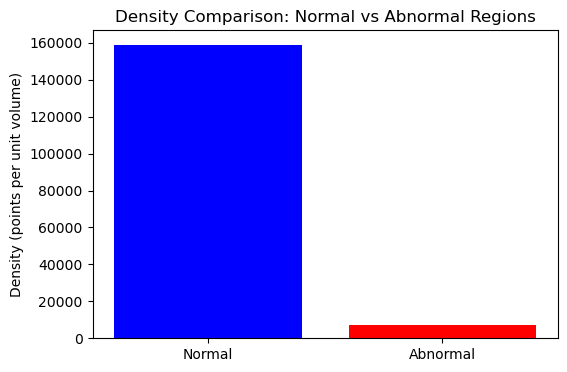

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Assume previous code has computed these:
# ---------------------------
# Load NPZ file and extract parameters
npz_path = r"D:\ASCC_parts_extended\workspace\model_params_20000_150_cams.npz"
state_dict = np.load(npz_path)
means = state_dict["means"]         # shape: (N, 3)
scales = state_dict["scales"]       # shape: (N, 3)

# Compute average scale for each Gaussian
avg_scales = scales.mean(axis=1)  # shape: (N,)

# Define a global threshold based on mean ± 2 * std
global_mean = np.mean(avg_scales)
global_std = np.std(avg_scales)
lower_threshold = global_mean - 2 * global_std
upper_threshold = global_mean + 2 * global_std

# Create masks for normal and abnormal Gaussians
normal_mask = (avg_scales >= lower_threshold) & (avg_scales <= upper_threshold)
abnormal_mask = ~normal_mask

# ---------------------------
# Compute Bounding Box Volume for a Set of Points
# ---------------------------
def bounding_box_volume(points):
    min_coords = points.min(axis=0)
    max_coords = points.max(axis=0)
    dims = max_coords - min_coords
    volume = np.prod(dims)
    return volume, min_coords, max_coords, dims

# Extract points for each group
normal_means = means[normal_mask]
abnormal_means = means[abnormal_mask]

# Compute bounding boxes
vol_normal, min_norm, max_norm, dims_norm = bounding_box_volume(normal_means)
vol_abnormal, min_abnorm, max_abnorm, dims_abnorm = bounding_box_volume(abnormal_means)

# Compute density as number of Gaussians divided by the volume of the bounding box
density_normal = normal_means.shape[0] / vol_normal
density_abnormal = abnormal_means.shape[0] / vol_abnormal

print("Normal region:")
print(" Count:", normal_means.shape[0])
print(" Volume:", vol_normal)
print(" Density (points per unit volume):", density_normal)

print("\nAbnormal region:")
print(" Count:", abnormal_means.shape[0])
print(" Volume:", vol_abnormal)
print(" Density (points per unit volume):", density_abnormal)

# ---------------------------
# Plot Bar Chart Comparison of Densities
# ---------------------------
labels = ['Normal', 'Abnormal']
densities = [density_normal, density_abnormal]

plt.figure(figsize=(6, 4))
plt.bar(labels, densities, color=['blue', 'red'])
plt.ylabel('Density (points per unit volume)')
plt.title('Density Comparison: Normal vs Abnormal Regions')
plt.show()


In [1]:
import numpy as np
import open3d as o3d
import os

# Load the .npy file
npy_file = r"C:\Users\abhilash.durgam\Documents\ascc_parts\blender_means.npy"
points = np.load(npy_file)

# Create Open3D point cloud object
pcd = o3d.geometry.PointCloud()

# Assign points
pcd.points = o3d.utility.Vector3dVector(points)

# Save as PLY
ply_file = os.path.splitext(npy_file)[0] + ".ply"
o3d.io.write_point_cloud(ply_file, pcd)

print("PLY file saved at:", ply_file)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
PLY file saved at: C:\Users\abhilash.durgam\Documents\ascc_parts\blender_means.ply


: 